In [37]:
import pandas as pd
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import urllib as u
import numpy as np
import csv

In [38]:
# Read in data
df = pd.read_csv('data/sites/kpi10808.csv')
df.head()

,Site_ID,Grade_Description,Date,Price,Profit,Volume,Competitor_Price,Fuel_Cost
0,10808,Premium Gas,2019-01-01,2.319,7.60,49.30,1.799000,1.534257
1,10808,Unleaded Gas,2019-01-01,1.769,9.73,1092.01,1.825667,1.323700
2,10808,Premium Gas,2019-01-02,2.309,14.78,83.84,1.799000,1.535803
3,10808,Unleaded Gas,2019-01-02,1.759,11.13,1955.47,1.819000,1.325600
4,10808,Premium Gas,2019-01-03,2.299,7.15,56.94,1.799000,1.553484


In [39]:
# Convert Date column to datetime
df['Date'] =  df['Date'].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603 entries, 0 to 1602
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Site_ID            1603 non-null   int64         
 1   Grade_Description  1603 non-null   object        
 2   Date               1603 non-null   datetime64[ns]
 3   Price              1603 non-null   float64       
 4   Profit             1603 non-null   float64       
 5   Volume             1603 non-null   float64       
 6   Competitor_Price   1603 non-null   float64       
 7   Fuel_Cost          1603 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 100.3+ KB


In [49]:
print(df.Grade_Description.unique())

['Premium Gas' 'Unleaded Gas' 'Midgrade Gas']


In [51]:
# Locate separate gas types
unleaded =  df.loc[df['Grade_Description'] == 'Unleaded Gas']
midgrade = df.loc[df['Grade_Description'] == 'Midgrade Gas']
premium = df.loc[df['Grade_Description'] == 'Premium Gas']

In [43]:
# # Plot
# fig, ax = plt.subplots()
# ax.plot(unleaded['Date'], unleaded[['Price', 'Fuel_Cost', 'Profit']])
# ax.set_ylabel('Price')
# ax.set_xlabel('Date')
# ax.set_title('Price vs Comp Price vs Cost')
# # ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
# # ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
# # plt.xticks(rotation=45)
# # plt.text(x=1970, y=400, s=r'Stock Price at this interval')
# # ax.properties()['children'][0].set_color('black')
# ax.properties()['children'][1].set_color('black')
# ax.properties()['children'][2].set_color('purple')
# fig.set_size_inches(18.5, 10.5)
# plt.grid()
# ax.legend(['Price', 'Fuel_Cost', 'Profit'], loc='upper left')
# ax.set_facecolor('xkcd:light grey')
# # graphPath = 'data/stocks'
# # graphName = input('Save graph as: ') + '.png'
# # graphFileName = os.path.join(graphPath, graphName)
# # plt.savefig(graphFileName)

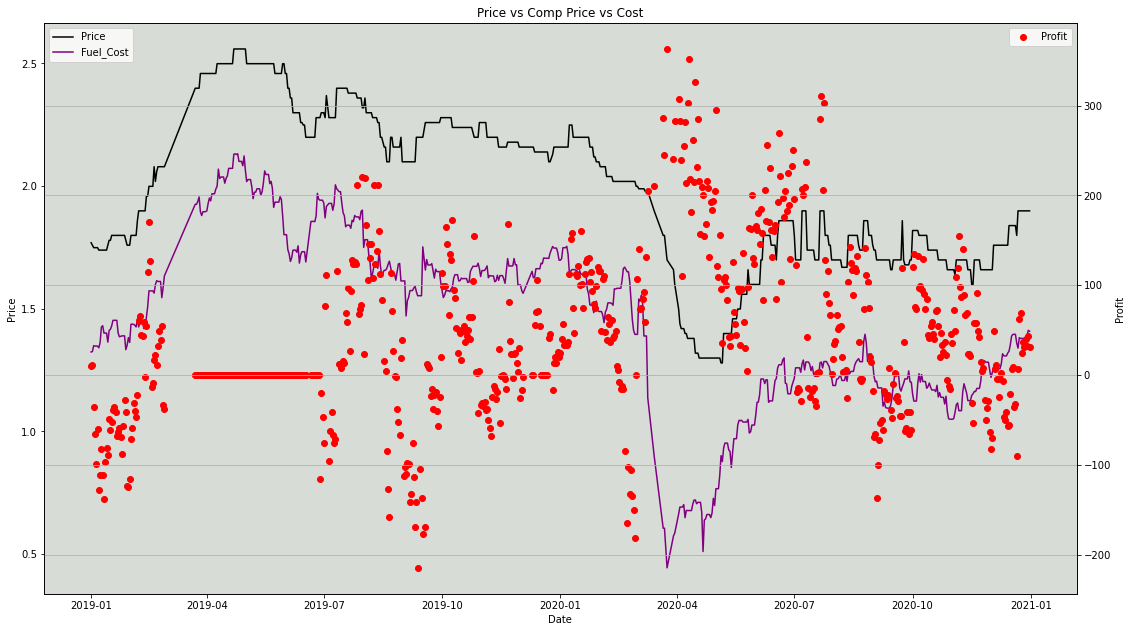

In [48]:
# Plot
fig, ax1 = plt.subplots()
ax1.plot(unleaded['Date'], unleaded[['Price', 'Fuel_Cost']])
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.set_title('Price vs Comp Price vs Cost')
ax1.properties()['children'][0].set_color('black')
ax1.properties()['children'][1].set_color('purple')

ax2 = ax1.twinx()
ax2.scatter(unleaded['Date'], unleaded['Profit'])
ax2.set_ylabel('Profit')
ax2.properties()['children'][0].set_color('red')
# ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
# ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
# plt.xticks(rotation=45)
# plt.text(x=1970, y=400, s=r'Stock Price at this interval')

fig.set_size_inches(18.5, 10.5)
plt.grid()
ax1.legend(['Price', 'Fuel_Cost', 'Profit'], loc='upper left')
ax1.set_facecolor('xkcd:light grey')

ax2.legend(['Profit'])
# graphPath = 'data/stocks'
# graphName = input('Save graph as: ') + '.png'
# graphFileName = os.path.join(graphPath, graphName)
# plt.savefig(graphFileName)